In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from abtem.ionization import SubshellTransitions
from abtem import Potential, GridScan, PlaneWave, Probe, FrozenPhonons, WavesDetector, CTF, PixelatedDetector, LineScan, AnnularDetector
from abtem import show_atoms
from ase.io import read

import os
os.environ["MKL_NUM_THREADS"] = "1"

from abtem import config

config.set({'device': 'cpu'})
config.set({'fft': 'mkl'})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
Z = 8 # atomic number
n = 1 # principal quantum number
l = 0 # azimuthal quantum number
xc = 'PBE' # exchange-correlation functional

O_transitions = SubshellTransitions(Z = Z, n = n, l = l, xc = 'PBE', epsilon=1)

print('bound electron configuration:', O_transitions.bound_configuration)
print('ionic electron configuration:', O_transitions.excited_configuration)

bound electron configuration: 1s2 2s2 2p4
ionic electron configuration: 1s1 2s2 2p4


In [3]:
transition_potentials = O_transitions.get_transition_potentials(extent=2, gpts=128, energy=300e3)

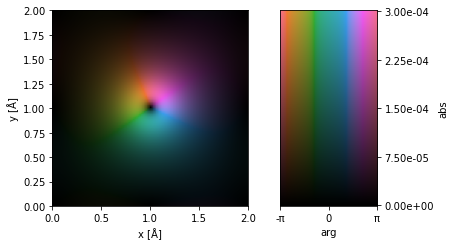

In [4]:
transition_images = transition_potentials.to_images()
transition_images[0].show(cbar=True, vmin=0, vmax=3e-4);

In [14]:
atoms = read('../data/srtio3_100.cif') * (3, 3, 13)

fp = FrozenPhonons(atoms, num_configs=4, sigmas=0.085, ensemble_mean=True)

potential = Potential(fp, gpts=256, slice_thickness=2, parametrization='lobato', projection='infinite', exit_planes=1)

waves = PlaneWave(energy=300e3)

waves.grid.match(potential)

detectors = [PixelatedDetector(fourier_space=False)] # detect real space image

ctf = CTF(semiangle_cutoff=25) # 25 mrad objective aperture

images = waves.multislice(potential, 
                          detectors=detectors, 
                          ctf=ctf,
                          transition_potentials=transition_potentials,
                         )

images.compute()

(<AxesSubplot:xlabel='x [Å]', ylabel='y [Å]'>,
 <matplotlib.image.AxesImage at 0x7fea1c32b850>)

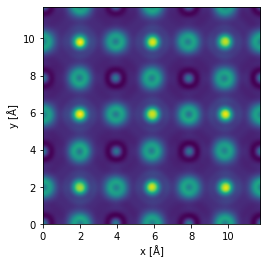

In [15]:
images[-1].show()